This notebook is to response for these questions :
 - Is it better work for one company or several?
 - does the number off people in team influence salary?
 - does years with this type of job influence salary?
 - is there a salary difference between man and woman?
 - is this difference due to the few number of women in IT?
 - is there a salary difference between man and woman in the same job?
 - describe in few lines your plan to live your own american dream

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
os.chdir ("/home/apprenant/PycharmProjects/pythonProject/lereveamericain/Data/03_processed")
career = pd.read_csv('data_processed.csv')

#### to preview the correlation between numeric columns:

In [3]:
career.corr()

,Unnamed: 0,Survey Year,SalaryUSD,YearsWithThisDatabase,YearsWithThisTypeOfJob,DatabaseServers
Unnamed: 0,1.000000,-0.933465,-0.035486,-0.000927,-0.097258,-0.008815
Survey Year,-0.933465,1.000000,0.058728,0.000012,0.125507,0.016719
SalaryUSD,-0.035486,0.058728,1.000000,0.003837,0.233170,0.055064
YearsWithThisDatabase,-0.000927,0.000012,0.003837,1.000000,-0.004161,-0.000952
YearsWithThisTypeOfJob,-0.097258,0.125507,0.233170,-0.004161,1.000000,-0.012905
DatabaseServers,-0.008815,0.016719,0.055064,-0.000952,-0.012905,1.000000


In [4]:
career.HowManyCompanies.value_counts()

Not Asked    3660
1             513
2             471
3             272
4             110
6 or more      93
5              76
Name: HowManyCompanies, dtype: int64

- Is it better to work for one company or several?

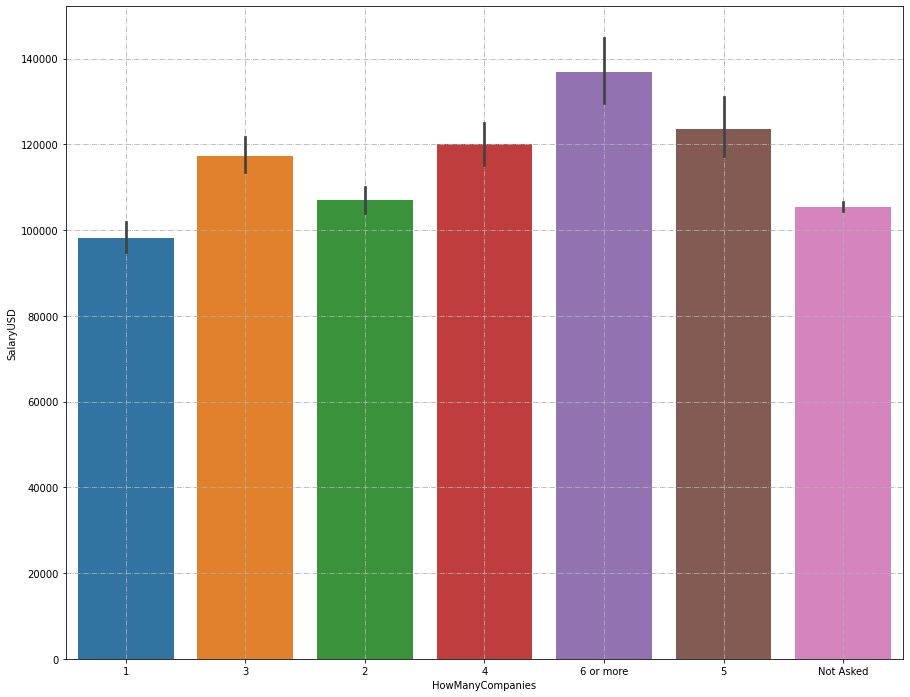

In [5]:
fig=plt.figure(figsize=(15,12))
fig.patch.set_facecolor('white')
ax= sns.barplot(y="SalaryUSD", x='HowManyCompanies',
                    data=career)
#
ax.grid(True, linestyle='-.')

there is little difference on salary if
working for several companies or not (perhaps due to the outliers)

 - does the number off people in team influence salary?

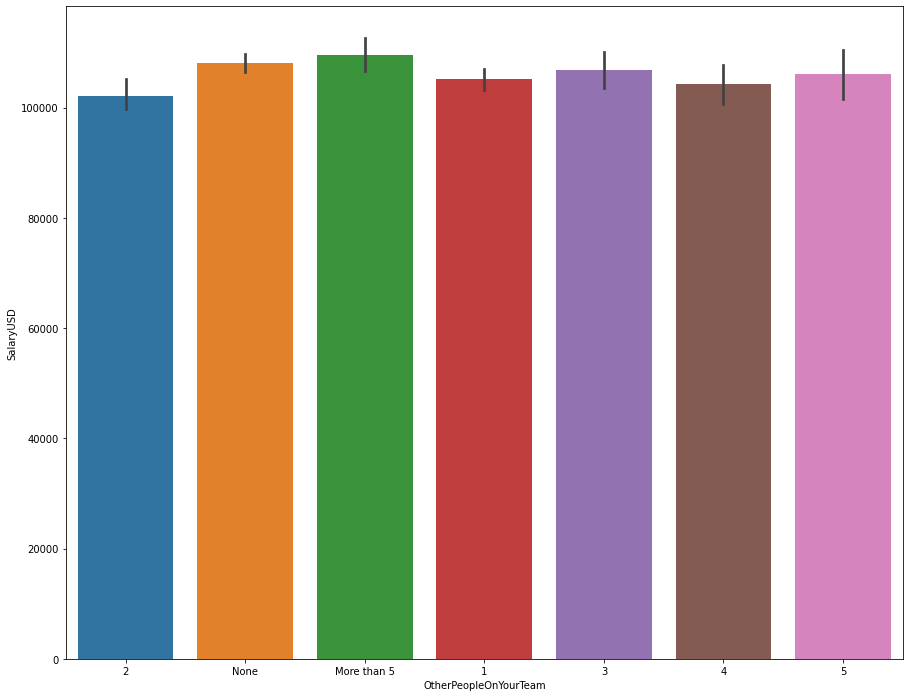

In [6]:
fig=plt.figure(figsize=(15,12))
fig.patch.set_facecolor('white')
ax= sns.barplot( y="SalaryUSD", x='OtherPeopleOnYourTeam',
                    data=career)

the number of people in the team doesn't influence the salary



does years with this type of job influence salary?

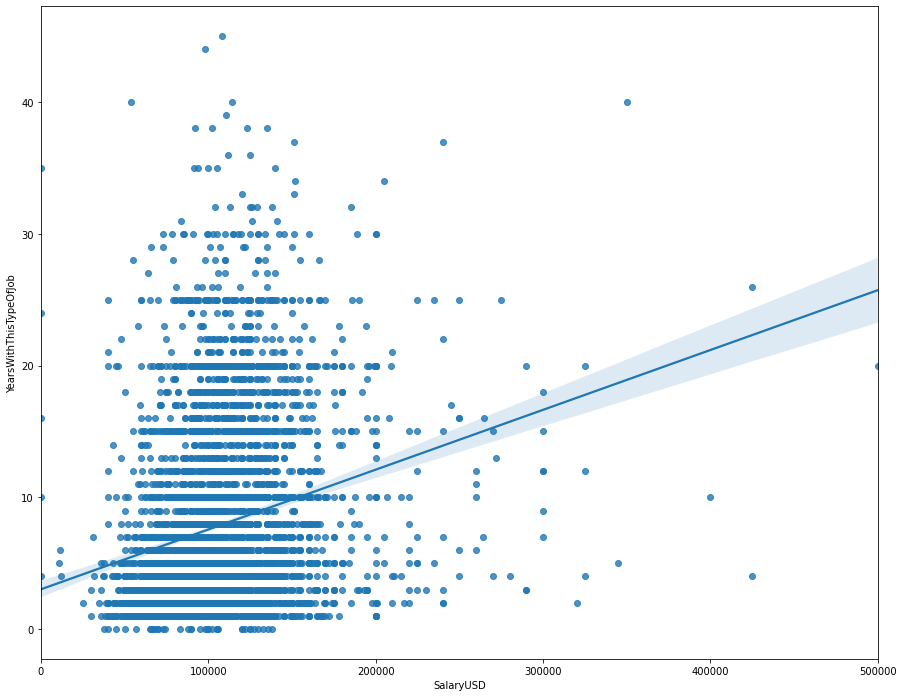

In [7]:
fig=plt.figure(figsize=(15,12))
fig.patch.set_facecolor('white')
ax = sns.regplot(x="SalaryUSD", y='YearsWithThisTypeOfJob',
                    data=career)

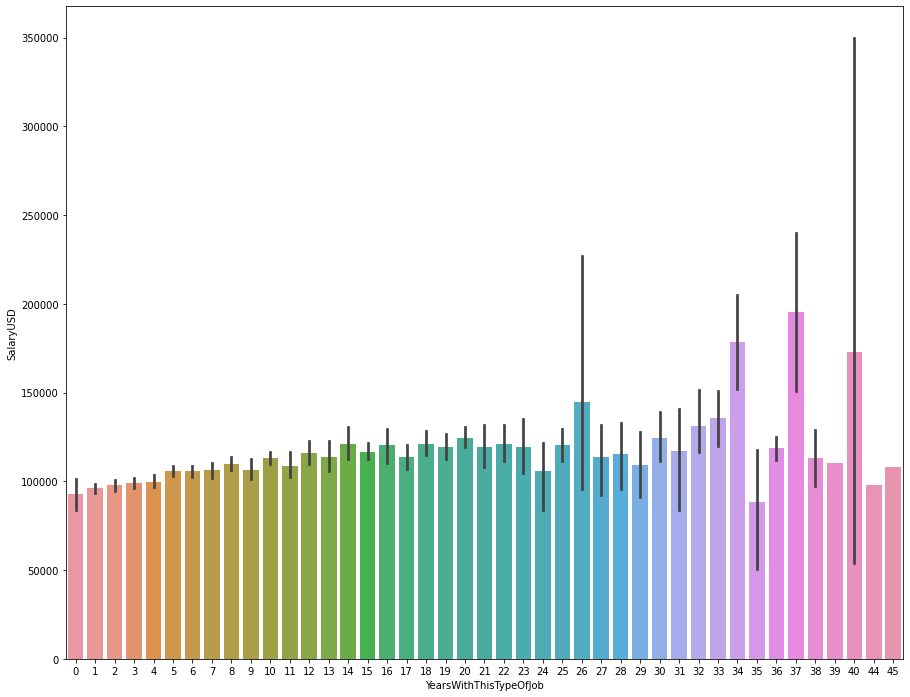

In [8]:
fig=plt.figure(figsize=(15,12))
fig.patch.set_facecolor('white')
ax= sns.barplot( y="SalaryUSD", x='YearsWithThisTypeOfJob',
                    data=career)

There is little relation between years in this type of job and the salary

 - is there a salary difference between man and woman?
 a pivot table can answer to the question

In [100]:
career_MW = career[career['Gender'] != 'Other']
career_MW.Gender.value_counts()

table_salary_gender= pd.pivot_table(career_MW, values=['SalaryUSD'], index=['Gender'],aggfunc={'SalaryUSD':np.mean})
table_salary_gender.reset_index(inplace = True)
salary_dif=table_salary_gender.SalaryUSD.loc[table_salary_gender.Gender =='Male'].values \
           - table_salary_gender.SalaryUSD.loc[table_salary_gender.Gender =='Female'].values
salary_dif

array([8069.21502778])

the difference between men and women is : 8069 $
so there is a little difference between men and women perhaps due to few number of women in the data set

 - is there a salary difference between man and woman in the same job?

as for the previous question, a pivot table can help us to answer to the question:

In [101]:
table_salary_gender_job = pd.pivot_table(career_MW, values=['SalaryUSD'], index=['JobTitle','Gender'],
                       aggfunc={'SalaryUSD':np.mean})
table_salary_gender_job

SalaryUSD
JobTitle            Gender               
Analyst             Female   73209.677419
                    Male     80209.828125
Architect           Female  124707.380952
                    Male    137670.367521
DBA                 Female  103394.663366
                    Male    106940.810927
Data Scientist      Female  129150.000000
                    Male    116295.454545
Developer BI        Female   97238.531250
                    Male    106511.089021
Developer: App code Female   88802.666667
                    Male     98558.362694
Developer: T-SQL    Female   90343.478261
                    Male    104914.735507
Engineer            Female  115264.375000
                    Male    113431.969925
Manager             Female  112793.684211
                    Male    127101.549296
Other               Female   78833.333333
                    Male     89876.456522

the jobs where women earn more than men are:
Data Scientist	Female	129150.000000
                Male	116295.454545
Engineer	    Female	115264.375000
                Male	113431.969925

 - describe in few lines your plan to live your own american dream:

 being a data scientist or engineer with some years in this job